In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#OBJECTIVE 1

Profile & QA the data
First objective is to :

1- read in the AirBnB listings data

2- calculate basic profiling metrics

3- change column datatypes as necessary

4- filter down to only Paris Listings.

In [2]:
#Import/Open the Listings.csv file
data = "Listings.csv"
Listings = pd.read_csv(data, encoding="ISO-8859-1", low_memory=False)
print(Listings)  # Check the data dimensions

        listing_id                                               name  \
0           281420     Beautiful Flat in le Village Montmartre, Paris   
1          3705183                    39 mÃÂ² Paris (Sacre CÃâur)   
2          4082273                Lovely apartment with Terrace, 60m2   
3          4797344                Cosy studio (close to Eiffel tower)   
4          4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms   
...            ...                                                ...   
279707    38338635  Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...   
279708    38538692                          Cozy Studio in Montmartre   
279709    38683356            Nice and cosy mini-appartement in Paris   
279710    39659000  Charming apartment near Rue Saint Maur / Oberk...   
279711    40219504        Cosy apartment with view on Canal St Martin   

         host_id  host_since                 host_location host_response_time  \
0        1466919  2011-12-03  Paris, Ile-d

In [6]:
#Cast date columns as a datetime format
Listings["host_since"]= pd.to_datetime(Listings["host_since"])
Listings(5)

TypeError: 'DataFrame' object is not callable

In [7]:
# Filter the data to retrieve rows where the 'city' column matches 'Paris'.
paris_data = Listings[Listings['city'] == 'Paris']

# Keep only the ones we want columns.
filtered_data = paris_data[['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

# our  filtered data: 
filtered_data


,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [ ]:
# Filtering the data down to rows where the city is Paris, and columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
paris_data = Listings.query("city=='Paris'"
                            ).loc[:,['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

# Display information about the DataFrame, including data types and missing values
paris_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


QA the Paris listings data: 

1- checking for missing values

In [ ]:
# checking for missing values
paris_data.isnull

<bound method DataFrame.isnull of        host_since      neighbourhood   city  accommodates  price
0      2011-12-03  Buttes-Montmartre  Paris             2     53
1      2013-11-29  Buttes-Montmartre  Paris             2    120
2      2014-07-31             Elysee  Paris             2     89
3      2013-12-17          Vaugirard  Paris             2     58
4      2014-12-14              Passy  Paris             2     60
...           ...                ...    ...           ...    ...
279707 2015-04-13       Observatoire  Paris             2    120
279708 2013-11-27  Buttes-Montmartre  Paris             2     60
279709 2012-04-27  Buttes-Montmartre  Paris             2     50
279710 2015-07-16         Popincourt  Paris             2    105
279711 2013-06-17  Enclos-St-Laurent  Paris             2     70

[64690 rows x 5 columns]>

In [ ]:
paris_data.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

2- calculate the minimum, maximum, and average for each numeric field


In [ ]:
paris_data.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [ ]:
# Calculate maximum 
max = paris_data[['accommodates', 'price']].max()

# Calculate minimum 
min = paris_data[['accommodates', 'price']].min()

# Calculate average value 
avg = paris_data[['accommodates', 'price']].mean()

# Display 
print("Maximum values:\n", max)
print("\nMinimum values:\n", min)
print("\nAverage values:\n", avg.round())


Maximum values:
 accommodates       16
price           12000
dtype: int64

Minimum values:
 accommodates    0
price           0
dtype: int64

Average values:
 accommodates      3.0
price           113.0
dtype: float64


In [11]:
# Finding the rows where both 'accommodates' and 'price' are zero
zero_data = paris_data.query("accommodates==0 and price==0").count()

In [12]:
# Find the rows where both 'accommodates' and 'price' are zero
zero_data = paris_data.query("accommodates==0 and price==0")

# Fill the zero values with appropriate data
paris_data_copy = paris_data.copy()  # Make a copy to avoid modifying the original DataFrame
paris_data_copy.loc[zero_data.index, ['accommodates', 'price']] = [1, 50]  # Filling with default values

# Display the count of rows where both 'accommodates' and 'price' are zero
print(zero_data)
zero_data.count()


        listing_id                                               name  \
98209     44312919        Bienvenue ÃÂ  l'HÃÂ´tel des 3 CollÃÂ¨ges   
203257    43012882                            Timhotel Paris Berthier   
203258    43035744                                         Le Pigalle   
203259    43274767                                        Hotel MAYET   
203260    43274785                                      Hotel AUGUSTE   
203261    44245257                          HÃÂ´tel Saint Cyr Etoile   
203263    44673383                      HÃÂ´tel La Bourdonnais Paris   
203264    45339370                    HOTEL DES NATIONS SAINT GERMAIN   
203265    45523086                               HOTEL EIFFEL CAPITOL   
203267    46113762                                  HÃÂ´tel Orchidee   
203268    46228352                          HOTEL PRINCE ALBERT OPERA   
203269    46351099  Best Western Plus HÃÂ´tel litteraire Marcel A...   
205561    46112723                   HÃÂ´tel Le Re

listing_id                     54
name                           54
host_id                        54
host_since                     54
host_location                  54
host_response_time             14
host_response_rate             14
host_acceptance_rate           24
host_is_superhost              54
host_total_listings_count      54
host_has_profile_pic           54
host_identity_verified         54
neighbourhood                  54
district                        0
city                           54
latitude                       54
longitude                      54
property_type                  54
room_type                      54
accommodates                   54
bedrooms                        0
amenities                      54
price                          54
minimum_nights                 54
maximum_nights                 54
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_

In [13]:
# Fill the zero values with appropriate data
paris_data_copy.loc[zero_data.index, ['accommodates', 'price']] = [1, 50]  # Filling with default values

# Display the updated DataFrame
print(paris_data_copy)


        listing_id                                               name  \
0           281420     Beautiful Flat in le Village Montmartre, Paris   
1          3705183                    39 mÃÂ² Paris (Sacre CÃâur)   
2          4082273                Lovely apartment with Terrace, 60m2   
3          4797344                Cosy studio (close to Eiffel tower)   
4          4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms   
...            ...                                                ...   
279707    38338635  Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...   
279708    38538692                          Cozy Studio in Montmartre   
279709    38683356            Nice and cosy mini-appartement in Paris   
279710    39659000  Charming apartment near Rue Saint Maur / Oberk...   
279711    40219504        Cosy apartment with view on Canal St Martin   

         host_id host_since                 host_location host_response_time  \
0        1466919 2011-12-03  Paris, Ile-de-

In [14]:
paris_data_copy.query("accommodates==0 and price==0").count()

listing_id                     0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
district                       0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_sco

## OBJECTIVE 2

1-Prepare the data for visualization

2-Produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

In [15]:
#CreateING a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high):

# Grouping the data by 'neighbourhood' column
paris_listings_neighbourhood = (
    paris_data_copy
    .groupby('neighbourhood')
    .agg({
        'price':'mean'
    })
    .sort_values('price')
)

paris_listings_neighbourhood


,price
neighbourhood,
Menilmontant,74.955561
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.223297
Reuilly,89.096081
Popincourt,90.575572
Gobelins,98.110184
Observatoire,101.927163
Batignolles-Monceau,102.647344
Enclos-St-Laurent,103.021175


In [16]:
paris_data_copy

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
#Create a table named paris_listings_accomodations and filter down to the most expensive neighborhood
#group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

paris_listings_accommodations = (
    paris_data_copy
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({'price':'mean'})
    .sort_values(by='price')
)
paris_listings_accommodations.tail()



,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [19]:
# Creating a table called paris_listings_over_time grouped by the ‘host_since’ year
# Calculate the average price and count of rows representing the number of new hosts

paris_listings_over_time = (
    paris_data_copy
    .set_index("host_since")
    .resample('Y')
    .agg({
        "neighbourhood":"count" ,
        "price" : "mean"
    })
    
                           )
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# OBJECTIVE 3

Visualization

<Axes: title={'center': 'Average Price by Neighbourhood in Paris'}, xlabel='Price', ylabel='Neighbourhood'>

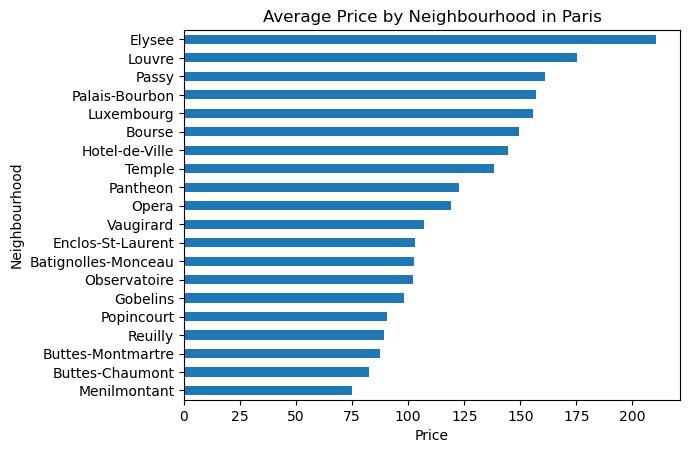

In [20]:
#Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

(paris_listings_neighbourhood
 .plot
 .barh(
    title='Average Price by Neighbourhood in Paris',
    xlabel='Price',
    ylabel='Neighbourhood',
    legend=None

    )
 )
 

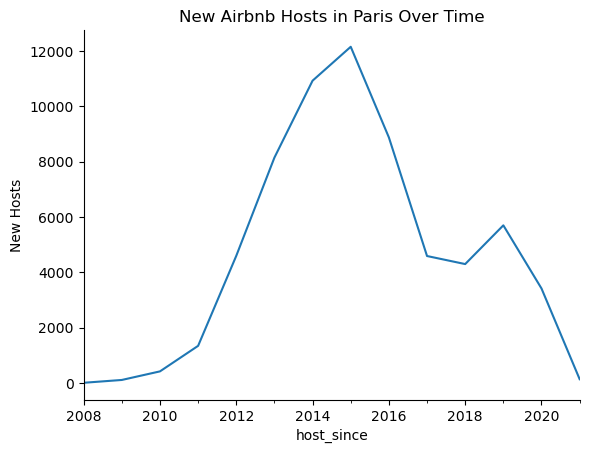

In [25]:
##Creating a line charts of the New Airbnb Hosts in Paris Over Time


paris_listings_over_time['neighbourhood'].plot(
    ylabel= "New Hosts",
    title= "New Airbnb Hosts in Paris Over Time"
)
sns.despine()

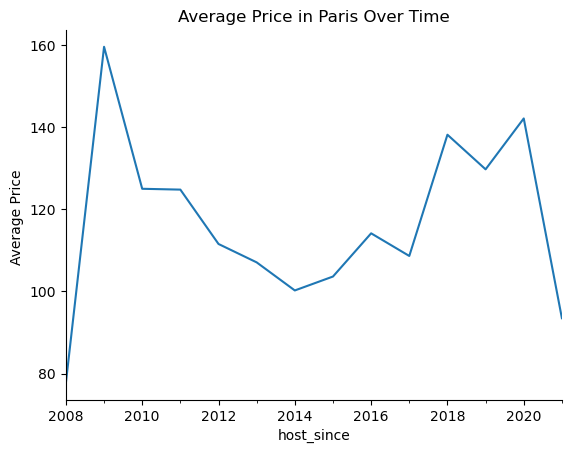

In [26]:
#Creating a line charts of the Average Price in Paris Over Time

paris_listings_over_time['price'].plot(
    ylabel= "Average Price ",
    title= "Average Price in Paris Over Time"
)
sns.despine()